# DT Assignment

# Data Loading

In [1]:
import pandas as pd 
import numpy as np

In [2]:
pd_data = pd.read_csv('https://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv')
pd_data.drop("RID",axis=1, inplace = True) #RID는 그냥 순서라서 삭제
pd_data

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_aged,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


## Gini 계수를 구하는 함수 만들기

$1-\sum_{i=1}^c p_i^2$ 
의 식으로 gini 계수를 구할 수 있다. 위의 식에서 c는 사건의 갯수를 의미한다.

<img src="gini.png" width="200">

- Input: df(데이터), label(타겟변수명)
- 해당 결과는 아래와 같이 나와야 합니다.

In [3]:
def get_gini(df, label):
    
    #전체 개수
    total_num = len(df[label])
    #각 클래스의 개수
    each_class_num = df[label].value_counts()
    
    #각 클래스의 확률
    each_class_prob = each_class_num / total_num
    
    # 1 - (각클래스 확률 제곱합)
    squared_prob=0
    for i in range(len(each_class_prob)):
        squared_prob += (each_class_prob[i])**2
    gini = 1-squared_prob
    
    
    return gini

In [4]:
get_gini(pd_data,'class_buys_computer')

0.4591836734693877

## Feature의 Class를 이진 분류로 만들기
- ex) {A,B,C} -> ({A}, {B,C}), ({B}, {A,C}), ({C}, {A,B})

- Input: df(데이터), attribute(Gini index를 구하고자 하는 변수명)
- Income 변수를 결과로 출력해주세요.

In [6]:
from itertools import combinations

def get_binary_split(df, attribute):
    
    uniques = list(df[attribute].unique()) # 속성 데이터 고유값들을 담은 리스트 
    result=[]
    
    for i in range(1, len(uniques)):
        #부분집합내의 요소 개수 : i
        num_i = len(list(combinations(uniques, i)))
        for j in range(num_i):
            #요소 개수가 i개인 모든 조합을 result에 추가
            result.append(list(list(combinations(uniques, i))[j]))
    
    return result

In [7]:
get_binary_split(pd_data,'income')

[['high'],
 ['medium'],
 ['low'],
 ['high', 'medium'],
 ['high', 'low'],
 ['medium', 'low']]

## 모든 이진분류의 경우의 Gini index를 구하는 함수 만들기
- 위에서 완성한 두 함수를 사용하여 만들어주세요!
- 해당 결과는 아래와 같이 나와야 합니다.

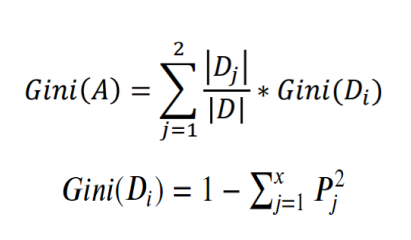

In [23]:
def get_attribute_gini_index(df, attribute, label):
    
    result = {}
    uniques= list(df[attribute].unique())
    
    #attribute의 unique값의 gini index
    
    for unique in uniques:
               
        gini_d1 = get_gini(df[df[attribute]==unique], label)
        d1 = len(df[df[attribute]==unique])
        gini_d2 = get_gini(df[df[attribute]!=unique], label)
        d2 = len(df[df[attribute]!=unique])
        d = len(df[attribute])
        #Gini Index 구함
        gini_index = (d1/d)*(gini_d1)+(d2/d)*(gini_d2)
        #딕셔너리에 추가
        result[unique] = gini_index
        
        unique_list = list(df[attribute].unique())
        unique_list.remove(unique)
        
        name = ""
        for i in range(len(unique_list)):
            if (i!=len(unique_list)-1):
                name += unique_list[i]
                name += '_'
            else : 
                name += unique_list[i]
            
        result[name] = gini_index
    
    return result

In [24]:
get_attribute_gini_index(pd_data, 'income', 'class_buys_computer')

{'high': 0.4428571428571429,
 'medium_low': 0.4428571428571429,
 'medium': 0.4583333333333333,
 'high_low': 0.4583333333333333,
 'low': 0.45,
 'high_medium': 0.45}

- 여기서 가장 작은 Gini index값을 가지는 class를 확인합니다.

In [25]:
min(get_attribute_gini_index(pd_data, 'income', 'class_buys_computer').items())

('high', 0.4428571428571429)

In [26]:
min(get_attribute_gini_index(pd_data, 'income', 'class_buys_computer').values())

0.4428571428571429

## 분류를 하는 데 가장 중요한 변수를 선정하고, 해당 변수의 Gini index를 제시해주세요.
- 모든 변수에 대한 Gini index(최소)를 출력해주세요.
- 해당 결과는 아래와 같이 나와야 합니다.

In [28]:
# 변수명 중 마지막에 위치한 label 컬럼 얻기
label = pd_data.columns[-1]
# label 변수를 제외한 변수명 얻기
features = list(pd_data.columns[:-1])

# 각 변수를 대상으로 반복문 수행(해당 변수 중 가장 낮은 gini 계수와 변수 출력)
for feature in features:
    print("Minimum Gini index of ",feature, " : ",round(min(get_attribute_gini_index(pd_data, feature, label).values()),4))

Minimum Gini index of  age  :  0.3571
Minimum Gini index of  income  :  0.4429
Minimum Gini index of  student  :  0.3673
Minimum Gini index of  credit_rating  :  0.4286


gini index가 가장 작게 나온 'age'를 가장 중요한 변수로 선정합니다.

이어서 해당 변수의 이진 분류된 각 class에 대해 Gini index도 계산합니다.

In [29]:
get_attribute_gini_index(pd_data, 'age', 'class_buys_computer')

{'youth': 0.3936507936507937,
 'middle_aged_senior': 0.3936507936507937,
 'middle_aged': 0.35714285714285715,
 'youth_senior': 0.35714285714285715,
 'senior': 0.45714285714285713,
 'youth_middle_aged': 0.45714285714285713}

'age' 변수에서 gini index가 가장 작게 나온 'middle_aged' class를 선정합니다.

## 위에서 선정한 feature로 DataFrame을 split한 후 나눠진 2개의 DataFrame에서 각각 다음으로 중요한 변수를 선정하고 해당 변수의 Gini index를 제시해주세요.

In [30]:
#선정한 feature로 데이터프레임 split을 해주세요.

df_1 = pd_data[pd_data['age'] == 'middle_aged']
df_2 = pd_data[pd_data['age'] != 'middle_aged']

In [31]:
df_1.head() #split 결과 확인 

,age,income,student,credit_rating,class_buys_computer
2,middle_aged,high,no,fair,yes
6,middle_aged,low,yes,excellent,yes
11,middle_aged,medium,no,excellent,yes
12,middle_aged,high,yes,fair,yes


In [32]:
df_2.head() #split 결과 확인

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no


In [34]:
# 각 변수를 대상으로 반복문 수행
# 결과는 소수점 이하 4자리까지 출력

features = ['income','student','credit_rating']

#df_1의 gini_index
for feature in features:
    print("Age: Middle_aged, Minimum Gini index of ",feature, " : ",round(min(get_attribute_gini_index(df_1, feature, label).values()),4) )
    
print("################################################")
#df_2의 gini_index
for feature in features:
    print("Age: Middle_aged, Minimum Gini index of ",feature, " : ",round(min(get_attribute_gini_index(df_2, feature, label).values()),4) )
  

Age: Middle_aged, Minimum Gini index of  income  :  0.0
Age: Middle_aged, Minimum Gini index of  student  :  0.0
Age: Middle_aged, Minimum Gini index of  credit_rating  :  0.0
################################################
Age: Middle_aged, Minimum Gini index of  income  :  0.375
Age: Middle_aged, Minimum Gini index of  student  :  0.32
Age: Middle_aged, Minimum Gini index of  credit_rating  :  0.4167


## Entropy 를 구하는 함수 만들기

<img src = https://miro.medium.com/max/1122/0*DkWdyGidNSfdT1Nu.png width = "350">

In [37]:
type(pd_data['class_buys_computer'].unique())

numpy.ndarray

In [38]:
from math import log2

def getEntropy(df, feature) :
    
    entropy = 0
    uniques = list(df[feature].unique())
    for unique in uniques:
        #unique의 확률
        prob = len(df[df[feature]==unique])/len(df[feature])
        entropy -= (prob * np.log2(prob))
        
    return(entropy)

In [39]:
getEntropy(pd_data, "class_buys_computer")

0.9402859586706311

In [40]:
# 가장 중요한 변수로 선정된 목표변수를 제외한 다른 변수들에 대해
# 각 칼럼별로 엔트로피를 구해주는 함수를 작성해주세요.

def getGainA(df, feature) :
        
    result = {}

    info_D = getEntropy(df, feature) # 목표변수에 대한 Entropy 를 구하기
    columns = list(df.loc[:, df.columns != feature]) # 목표변수(feature)를 제외한 나머지 변수들의 변수명을 리스트 형태로 저장
    
    for col in columns:
        info = 0
        
        col_unique = list(df[col].unique())
        for uni in col_unique:
            info += (len(df[df[col]==uni])/len(df[col])) * getEntropy(df[df[col]==uni],feature)
        result[col] = info_D - info
    
    return(result)

In [41]:
getGainA(pd_data, "class_buys_computer")

{'age': 0.24674981977443933,
 'income': 0.02922256565895487,
 'student': 0.15183550136234159,
 'credit_rating': 0.04812703040826949}